# 1. Install and import libraries

In [44]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', message="Coordinate descent without L1 regularization may lead to unexpected results and is discouraged.")
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [45]:
# Basic
import numpy as np
import pandas as pd
from functools import partial

# Scikit-Learn
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Matplotlib
from matplotlib.pyplot import subplots

## 2. Load and preprocess data

We start by loding and preprocessing our data. We follow these steps:

- Drop missing values
- Drop ``Unnamed: 0`` as it represents the old index
- Binarize categorical columns and drop one category to avoid redundancy in the binary representation
- Reindex the dataframe

In [52]:
hitters = pd.read_csv('https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/hitters.csv')
hitters = hitters.dropna()
hitters = hitters.drop(columns = ['Unnamed: 0'])
hitters = pd.get_dummies(hitters, dtype='int')
hitters = hitters.drop(columns = ['League_A', 'Division_E', 'NewLeague_A'])
hitters = hitters.reindex()
hitters.shape

(263, 20)

## 3. Ridge Regresion

### 3.1. Estimate coefficients

Let's divide our dataset into a vector of `Y` predicted and a matrix of `X` predictors

In [4]:
Y = np.array(hitters['Salary'])
X = hitters.drop(columns=['Salary'])

Now let's fit a model and extract an array of coefficient corresponding to the solutions along the regularization path. We follow these steps:

1. Define a scaler function
2. Scale the matrix of `X` predictors
3. Define the regularization path of $\lambda$
4. Estimate the coefficients using the ``skl.ElasticNet.path`` function where:

    - ``Xs``: the scaled matrix of predictors
    - ``Y``: vector of predicted var
    - ``l1_ratio``: defines the type of regularization, where ``0`` equals to Ridge and ``1`` equals to Lasso. Intermediate values equal to different configurations of Elastic Net.
    - ``lambdas``: the regularization path

In [55]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
lambdas = 10**np.linspace(8, -2, 100) / Y.std()
soln_array = skl.ElasticNet.path(Xs, Y, l1_ratio=0, alphas=lambdas)[1]

We then build a Pandas Dataframe to ease visualization of coefficients. Columns represent to predictor vars and index represents the regularization strength

In [57]:
soln_path = pd.DataFrame(soln_array.T, columns=X.columns, index=np.log(lambdas))
soln_path.index.name = 'negative log(lambda)'
soln_path

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
negative log(lambda),,,,,,,,,,,,,,,,,,,
12.310855,0.000800,0.000889,0.000695,0.000851,0.000911,0.000900,0.000812,0.001067,0.001113,0.001064,0.001141,0.001149,0.000993,0.000609,0.000052,-0.000011,-0.000029,-0.000390,-0.000006
12.078271,0.001010,0.001122,0.000878,0.001074,0.001150,0.001135,0.001025,0.001346,0.001404,0.001343,0.001439,0.001450,0.001253,0.000769,0.000065,-0.000014,-0.000037,-0.000492,-0.000007
11.845686,0.001274,0.001416,0.001107,0.001355,0.001451,0.001433,0.001293,0.001698,0.001772,0.001694,0.001816,0.001830,0.001581,0.000970,0.000082,-0.000017,-0.000046,-0.000621,-0.000009
11.613102,0.001608,0.001787,0.001397,0.001710,0.001831,0.001808,0.001632,0.002143,0.002236,0.002138,0.002292,0.002309,0.001995,0.001224,0.000104,-0.000022,-0.000058,-0.000784,-0.000012
11.380518,0.002029,0.002255,0.001763,0.002158,0.002310,0.002281,0.002059,0.002704,0.002821,0.002698,0.002892,0.002914,0.002517,0.001544,0.000131,-0.000028,-0.000073,-0.000990,-0.000015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-9.784658,-290.823989,336.929968,37.322686,-59.748520,-26.507086,134.855915,-17.216196,-387.775825,89.573600,-12.273926,476.079272,257.271255,-213.124780,78.761266,53.622112,-22.208457,31.258216,-58.457857,-12.402891
-10.017243,-290.879272,337.113712,37.431373,-59.916820,-26.606957,134.900549,-17.108041,-388.458403,89.000706,-12.661460,477.031348,257.966790,-213.280891,78.761240,53.645147,-22.198802,31.256435,-58.448850,-12.391969
-10.249827,-290.923382,337.260446,37.518064,-60.051166,-26.686604,134.936136,-17.022194,-388.997469,88.537379,-12.971603,477.791860,258.523025,-213.405740,78.761230,53.663357,-22.191071,31.254959,-58.441682,-12.383205


Now let's plot the Pandas DataFrame of varying coefficients

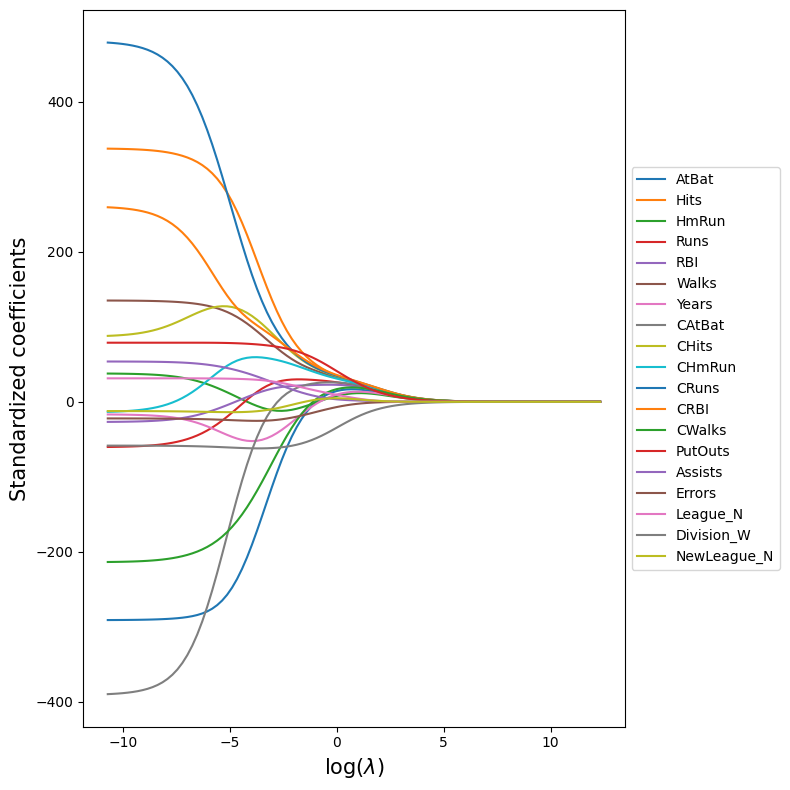

In [58]:
path_fig, ax = subplots(figsize=(8, 8))
soln_path.plot(ax=ax, legend=True)
ax.set_xlabel(r'$\log(\lambda)$', fontsize=15)
ax.set_ylabel('Standardized coefficients', fontsize=15)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
path_fig.tight_layout()

### 3.2. Estimate the test error

Selecting a predetermined value of $\lambda$ can be challenging, if not impossible. It's preferable to employ validation methods or Cross-Validation to determine the optimal tuning parameter. We can use the ``GridSearchCV()`` to perform an exahustive grid seach to choose such a parameter. We follow these steps:

1. Define a Ridge Model using the `ElasticNet` function
2. Define the scaler using the ``StandardScaler`` function
3. Define a pip object to integrate the deployment of the model and the scaling into one step

In [8]:
ridge = skl.ElasticNet(l1_ratio=0)
scaler = StandardScaler(with_mean=True, with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('ridge', ridge)])

Defined the pipeline we can tune the $\lambda$ parameter as follows:

1. Set a Cross-Validation approch. In this case we use the Validation Set approach
2. Define the regularization path of $\lambda$
3. Create a ``param_grid`` dictionary with ridge__alpha mapped to the array of lambda values
4. Define ``grid`` as a GridSearchCV object, configured with our pipeline, parameter grid, cross-validation strategy, and scoring metric.
5. Fit it to our data.
6. Find the best estimator


In [59]:
validation = skm.ShuffleSplit(n_splits=1, test_size=0.5, random_state=0)
lambdas    = 10**np.linspace(8, -2, 100) / Y.std()
param_grid = {'ridge__alpha': lambdas}
grid       = skm.GridSearchCV(pipe, param_grid, cv=validation, scoring='neg_mean_squared_error')
grid.fit(X, Y)
# grid.best_params_['ridge__alpha']
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.005899006046740856, l1_ratio=0))])

We may want to use a different Cross Validation Approach. Let's try the K-Fold approach. Our scoring metric is Mean Square Error.

In [60]:
K          = 5
kfold      = skm.KFold(K, random_state=0, shuffle=True)
lambdas    = 10**np.linspace(8, -2, 100) / Y.std()
param_grid = {'ridge__alpha': lambdas}
grid       = skm.GridSearchCV(pipe, param_grid, cv=kfold, scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.01185247763144249, l1_ratio=0))])

We can plot the Cross Validated MSE across different values of $\lambda$ by using the ``errorbar`` function. We use the following parameters:


- **X-axis (np.log(lambdas)):** Represents the logarithm of lambda values. This scaling makes it easier to see the results, especially when lambda changes a lot.

- **Y-axis (-grid.cv_results_['mean_test_score']):** Shows the negative mean squared error for each lambda. We use negative because, in this context, lower error values are better, and we want to display them as positive values on the graph.

- **Error Bars (yerr=grid.cv_results_['std_test_score'] / np.sqrt(K)):** The vertical lines on each point, showing the variability of the error. They represent the standard error, calculated from the standard deviation of the error over the cross-validation folds.

Text(0, 0.5, 'Cross-validated MSE')

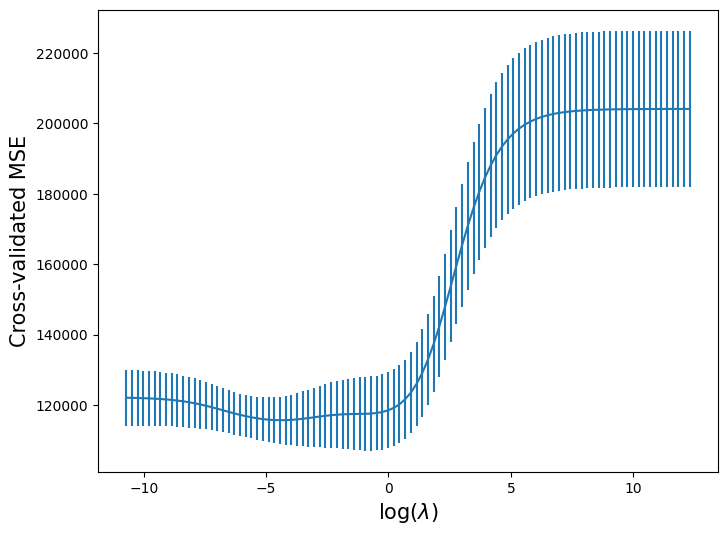

In [11]:
ridge_fig, ax = subplots(figsize=(8,6))
ax.errorbar(np.log(lambdas), -grid.cv_results_['mean_test_score'], yerr=grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_xlabel(r'$\log(\lambda)$', fontsize=15)
ax.set_ylabel('Cross-validated MSE', fontsize=15)

We may want to define a different scoring criteria to perform Cross-Validation. Here we use the ``r2`` score instead of the ``neg_mean_squared_error``

Text(0, 0.5, 'Cross-validated $R^2$')

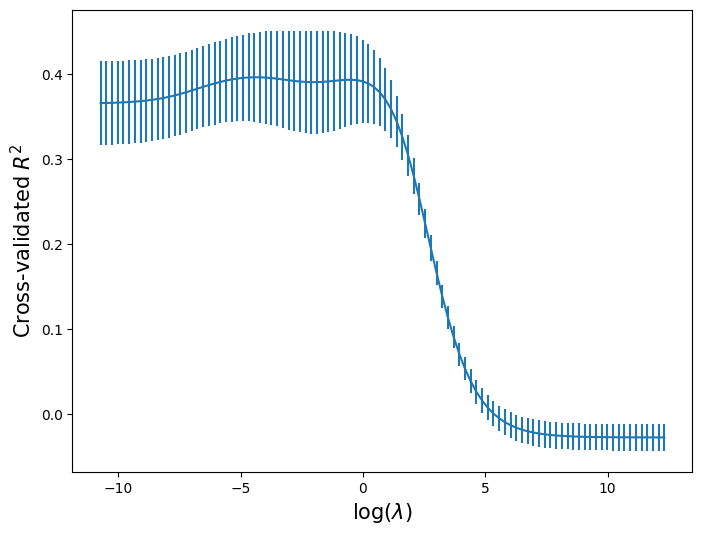

In [61]:
grid_r2 = skm.GridSearchCV(pipe, param_grid, cv=kfold, scoring ='r2')
grid_r2.fit(X, Y)

r2_fig, ax = subplots(figsize=(8,6))
ax.errorbar(np.log(lambdas),
grid_r2.cv_results_['mean_test_score'],
yerr=grid_r2.cv_results_['std_test_score'] / np.sqrt(K)
)
ax.set_xlabel(r'$\log(\lambda)$', fontsize=15)
ax.set_ylabel('Cross-validated $R^2$', fontsize=15)

### 3.3. Fast Cross-Validation for Solution Paths

An effective way to deploy Cross-Validated Ridge models is to use the ``ElasticNetCV`` function. We follow these steps:

1. Set the Cross Validation strategy. In this case we use the K-Fold approach
2. Define the regularization path of $\lambda$
3. Define the scaler

In [13]:
K       = 5
kfold   = skm.KFold(K, random_state=0, shuffle=True)
lambdas = 10**np.linspace(8, -2, 100) / Y.std()
scaler  = StandardScaler(with_mean=True, with_std=True)

We now deploy the model by:

4. Defining the Ridge model using the ``ElasticNetCV`` function. As with the ``ElasticNet`` function, ``0`` equals to Ridge and ``1`` equals to Lasso. Intermediate values equal to different configurations of Elastic Net.
5. Integrate the scaling and de model definition into a ``pipeCV`` object
6. Fit the model using the ``pipeCV`` object

In [62]:
ridgeCV = skl.ElasticNetCV(alphas=lambdas, l1_ratio=0, cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler), ('ridge', ridgeCV)])
pipeCV.fit(X, Y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 ElasticNetCV(alphas=array([2.22093791e+05, 1.76005531e+05, 1.39481373e+05, 1.10536603e+05,
       8.75983676e+04, 6.94202082e+04, 5.50143278e+04, 4.35979140e+04,
       3.45506012e+04, 2.73807606e+04, 2.16987845e+04, 1.71959156e+04,
       1.36274691e+04, 1.07995362e+04, 8.55844774e+03, 6.78242347e+03,
       5.37495461e+03, 4.25955961e+03,...
       1.84386167e-03, 1.46122884e-03, 1.15799887e-03, 9.17694298e-04,
       7.27257037e-04, 5.76338765e-04, 4.56738615e-04, 3.61957541e-04,
       2.86845161e-04, 2.27319885e-04, 1.80147121e-04, 1.42763513e-04,
       1.13137642e-04, 8.96596467e-05, 7.10537367e-05, 5.63088712e-05,
       4.46238174e-05, 3.53636122e-05, 2.80250579e-05, 2.22093791e-05]),
                              cv=KFold(n_splits=5, random_state=0, shuffle=True),
                              l1_ratio=0))])

We now can plot the optimal value for $\lambda$ with the same parameters as above

Text(0, 0.5, 'Cross-validated MSE')

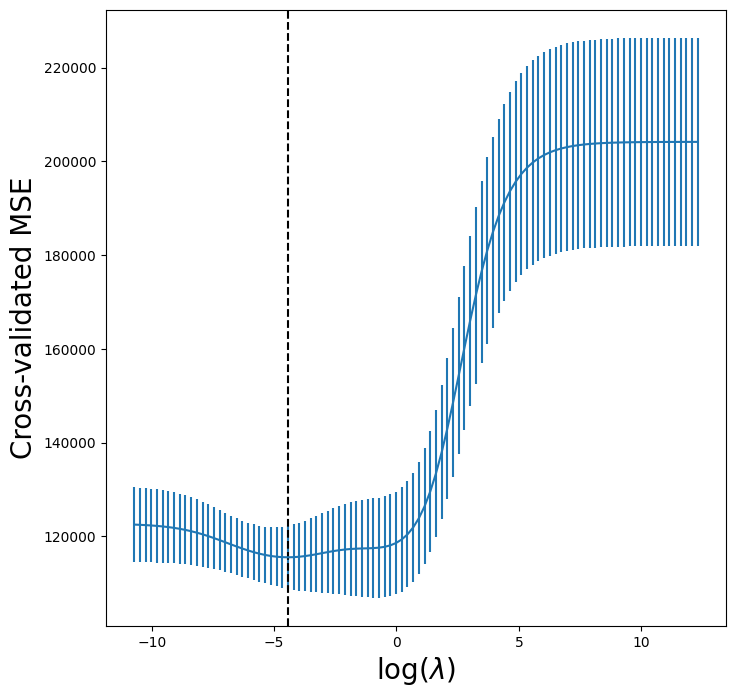

In [63]:
tuned_ridge = pipeCV.named_steps['ridge']
ridgeCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(np.log(lambdas), tuned_ridge.mse_path_.mean(1), yerr=tuned_ridge.mse_path_.std(1) / np.sqrt(K))
ax.axvline(np.log(tuned_ridge.alpha_), c='k', ls='--')
ax.set_xlabel(r'$\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20)

The optimal value of $\lambda$ is

In [16]:
np.log(tuned_ridge.alpha_)

-4.435218350433613

Now we estimate the MSE for the optimal value of $\lambda$

In [65]:
np.min(tuned_ridge.mse_path_.mean(1))

115526.70630988991

We can also take a look at the coefficients

In [66]:
ridge_coefs = tuned_ridge.coef_
ridge_df = pd.DataFrame({'Variable': X.columns,'Coefficient': ridge_coefs})
ridge_df = ridge_df.sort_values(by='Coefficient', ascending=False)
ridge_df

,Variable,Coefficient
1,Hits,238.772466
10,CRuns,210.351703
8,CHits,122.007148
11,CRBI,118.056837
5,Walks,108.909539
13,PutOuts,77.738325
9,CHmRun,57.185951
14,Assists,40.073507
16,League_N,30.366342
4,RBI,3.648887


### 3.4. Evaluating the Test Error by a Cross-Validation nested with Validation Set approach

While cross-validation is a reliable method for choosing the best $\lambda$, it uses all available data to fine-tune the model parameters. This leaves us without untouched data to objectively assess the model's performance.

To ensure we have an independent dataset for testing, we initially split the data into two separate sets: a training set and a test set. This separation ensures that the final evaluation of the model is on data that was never used during the model tuning process.

We then apply cross-validation on the training set to select the optimal λ. After tuning the model with cross-validation, we assess its performance on the separate test set. This strategy, known as 'cross-validation nested within the validation set approach,' provides a more accurate estimate of how the model will perform on unseen data.

We start by setting an outer validation set that accounts for the 25% of the total sample. We will use this set to evaluate the Cross Validation MSE.

In [77]:
outer_valid = skm.ShuffleSplit(n_splits=1, test_size=0.25, random_state=1)

We then define an inner K-Fold Cross-Validation strategy that we will use to train the Ridge Model

In [78]:
inner_cv = skm.KFold(n_splits=5, shuffle=True, random_state=2)

Next, the Ridge model is configured using the ``ElasticNetCV`` function, noting that the ``l1_ratio`` parameter is set to ``0`` for the Ridge model (and ``1`` for the Lasso model). Additionaly we define a ``scaler`` object.A pipeline is also established to seamlessly integrate the scaling strategy with the model execution.

In [79]:
ridgeCV = skl.ElasticNetCV(alphas=lambdas, l1_ratio=0, cv=inner_cv)
scaler = StandardScaler()
pipeCV = Pipeline(steps=[('scaler', scaler), ('ridge', ridgeCV)])

Finally, we compute the cross-validation MSE on the validation set to understand the model's performance.

In [81]:
results = skm.cross_validate(pipeCV, X, Y, cv=outer_valid, scoring='neg_mean_squared_error')
print(f'The Cross Validation MSE on the validation set is: {-results['test_score']}')

The Cross Validation MSE on the validation set is: [132393.84003227]


## 4. Lasso Regression

Let's fit a model and extract an array of coefficient corresponding to the solutions along the regularization path, the same way as we did we the Ridge model. We change the ``l1_ration`` argument to ``1``

In [67]:
Xs = scaler.fit_transform(X)
lambdas = 10**np.linspace(8, -2, 100) / Y.std()

soln_array = skl.ElasticNet.path(Xs, Y, l1_ratio=1, alphas=lambdas)[1]

We then build a Pandas DataFrame to visualize the coefficients

In [68]:
soln_path = pd.DataFrame(soln_array.T, columns=X.columns, index=np.log(lambdas))
soln_path.index.name = 'negative log(lambda)'
soln_path

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
negative log(lambda),,,,,,,,,,,,,,,,,,,
12.310855,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
12.078271,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
11.845686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
11.613102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
11.380518,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-9.784658,-291.094716,337.828637,37.851321,-60.570116,-26.992355,135.073027,-16.694496,-391.023198,86.684938,-14.176685,480.739117,260.680456,-213.890973,78.761367,53.731825,-22.160678,31.248337,-58.414016,-12.348394
-10.017243,-291.094683,337.829019,37.851843,-60.570606,-26.992901,135.073208,-16.694260,-391.026405,86.685493,-14.177731,480.740781,260.682413,-213.891240,78.761352,53.731963,-22.160716,31.248425,-58.414025,-12.348481
-10.249827,-291.094656,337.829322,37.852257,-60.570995,-26.993333,135.073351,-16.694073,-391.028947,86.685935,-14.178559,480.742100,260.683963,-213.891451,78.761341,53.732072,-22.160747,31.248495,-58.414033,-12.348549


We can plot how coefficients vary across different values of $\lambda$

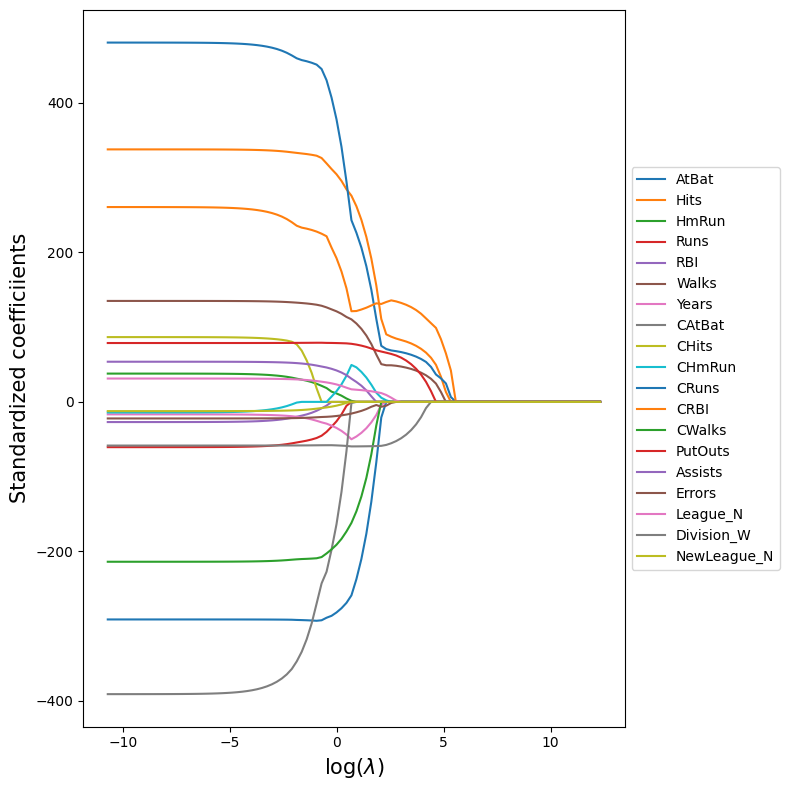

In [69]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax.set_xlabel(r'$\log(\lambda)$', fontsize=15)
ax.set_ylabel('Standardized coefficiients', fontsize=15)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
path_fig.tight_layout()

Now let's use the ``ElasticNetCV`` to fastly deploy the Cross Validated Lasso Model. We first define the arguments and fit the model.

In [70]:
K       = 5
kfold   = skm.KFold(K, random_state=0, shuffle=True)
lambdas = 10**np.linspace(8, -2, 100) / Y.std()
scaler  = StandardScaler(with_mean=True, with_std=True)

lassoCV = skl.ElasticNetCV(n_alphas=100, l1_ratio=1,cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler), ('lasso', lassoCV)])
pipeCV.fit(X, Y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso',
                 ElasticNetCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                              l1_ratio=1))])

This is the optimal value for $\lambda$

In [71]:
tuned_lasso = pipeCV.named_steps['lasso']
np.log(tuned_lasso.alpha_)

1.1465249260711425

We now estimate the MSE for the optimal value of $\lambda$

In [75]:
np.min(tuned_lasso.mse_path_.mean(1))

114690.72511801613

We can produce a plot for Cross-Validation error as well

Text(0, 0.5, 'Cross-validated MSE')

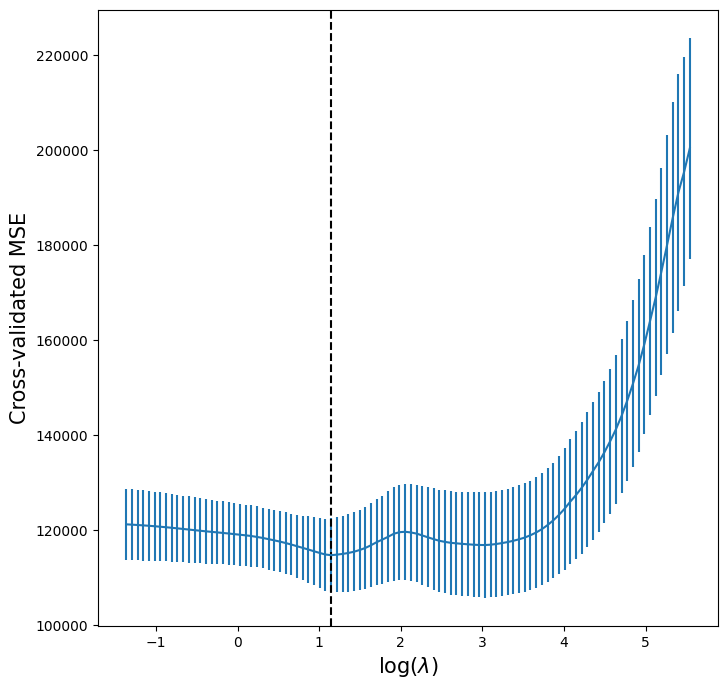

In [73]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(np.log(tuned_lasso.alphas_), tuned_lasso.mse_path_.mean(1), yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_xlabel(r'$\log(\lambda)$', fontsize=15)
ax.set_ylabel('Cross-validated MSE', fontsize=15)

And finally we show the optimal coefficients

In [74]:
lasso_coefs = tuned_lasso.coef_
lasso_df    = pd.DataFrame({'Variable': X.columns,'Coefficient': lasso_coefs})
lasso_df    = lasso_df.sort_values(by='Coefficient', ascending=False)
lasso_df

,Variable,Coefficient
1,Hits,243.454995
10,CRuns,205.753399
11,CRBI,124.554367
5,Walks,97.694078
13,PutOuts,75.245941
9,CHmRun,39.623072
14,Assists,21.626996
16,League_N,15.702621
18,NewLeague_N,-0.000000
8,CHits,0.000000
